In [ ]:
"""Simple tutorial for using TensorFlow to compute a linear regression.

Parag K. Mital, Jan. 2016"""

In [2]:
# %% imports
%matplotlib notebook
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

In [3]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
config = tf.ConfigProto(gpu_options=gpu_options)

<IPython.core.display.Javascript object>


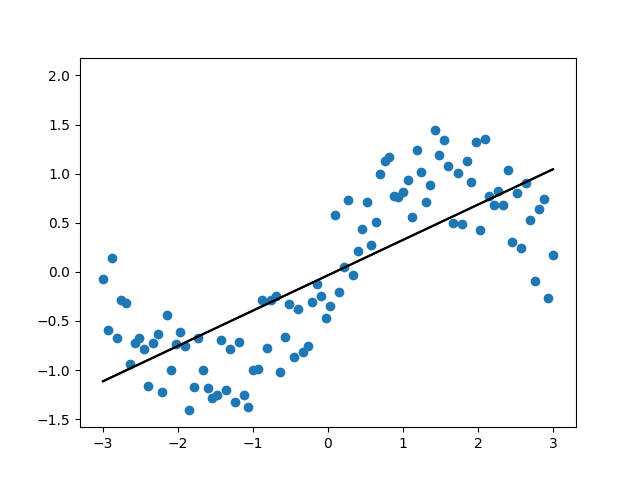

In [4]:
# %% Let's create some toy data
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [5]:
print(xs.shape)

(100,)


In [6]:
# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [7]:
# %% We will try to optimize min_(W,b) ||(X*w + b) - y||^2
# The `Variable()` constructor requires an initial value for the variable,
# which can be a `Tensor` of any type and shape. The initial value defines the
# type and shape of the variable. After construction, the type and shape of
# the variable are fixed. The value can be changed using one of the assign
# methods.
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.multiply(X, W), b)

In [8]:
# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

In [ ]:
# %% if we wanted to add regularization, we could add other terms to the cost,
# e.g. ridge regression has a parameter controlling the amount of shrinkage
# over the norm of activations. the larger the shrinkage, the more robust
# to collinearity.
# cost = tf.add(cost, tf.mul(1e-6, tf.global_norm([W])))

In [9]:
# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
    # %% We create a session to use the graph
    n_epochs = 300
    # with tf.Session(config=config) as sess:
    sess = tf.Session(config=config)
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    init = tf.global_variables_initializer()
    sess.run(init)

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        
        if epoch_i % 10 == 0:
            training_cost = sess.run(
                cost, feed_dict={X: xs, Y: ys})
            print(training_cost)

        if epoch_i % 100 == 0:
            # fig, ax = plt.subplots(1, 1)
            ax.plot(xs, Y_pred.eval(
                feed_dict={X: xs}, session=sess),
                    'k', alpha=epoch_i / n_epochs)
            fig.canvas.draw()
            # plt.draw()

        # Allow the training to quit if we've reached a minimum
        # if np.abs(prev_training_cost - training_cost) < 0.000001:
        #     break
        prev_training_cost = training_cost


2.80176
1.34549
0.810277
0.580286
0.463952
0.397229
0.355944
0.329383
0.311979
0.300485
0.292869
0.287818
0.28447
0.282253
0.280786
0.279819
0.279183
0.278765
0.278493
0.278316
0.278202
0.278129
0.278083
0.278055
0.278038


In [14]:
    y_pred = Y_pred.eval(
        feed_dict={X: xs}, session=sess)
    ax.plot(xs, y_pred,
        'k')
    fig.canvas.draw()
    # plt.draw()
    # plt.pause(0.001)

In [13]:
y_pred

array([-1.11400139, -1.09219944, -1.07039762, -1.04859567, -1.02679372,
       -1.00499189, -0.98319   , -0.96138805, -0.93958616, -0.91778427,
       -0.89598244, -0.87418044, -0.85237861, -0.83057672, -0.80877483,
       -0.78697288, -0.76517099, -0.74336916, -0.72156721, -0.69976538,
       -0.67796344, -0.65616155, -0.63435966, -0.61255777, -0.59075588,
       -0.56895399, -0.5471521 , -0.52535021, -0.50354832, -0.48174644,
       -0.45994455, -0.43814266, -0.41634071, -0.39453888, -0.37273699,
       -0.3509351 , -0.32913321, -0.30733126, -0.28552938, -0.26372749,
       -0.24192561, -0.22012372, -0.19832183, -0.17651995, -0.15471804,
       -0.13291615, -0.11111426, -0.08931237, -0.06751048, -0.04570858,
       -0.02390669, -0.0021048 ,  0.0196971 ,  0.04149899,  0.06330089,
        0.08510277,  0.10690467,  0.12870656,  0.15050845,  0.17231034,
        0.19411223,  0.21591412,  0.237716  ,  0.25951791,  0.2813198 ,
        0.30312169,  0.32492357,  0.34672546,  0.36852735,  0.39

In [15]:
sess.close()